# Numerical solution of initial value problems: epidemic models

* In the mathematical modeling and prediction of epidemic spread, the so-called *compartment models* have been found to be highly applicable.
* A common feature of these models is that the population exposed to the epidemic is divided into groups, and the changes in the size of these groups are described by a system of differential equations based on some mass-action kinetics principle.
* In most cases, compartment models arise as scaling limits of stochastic epidemic models: in the microscopic description, the population is perfectly mixed, each compartment contains a whole number of individuals at any given time, and the time evolution is described by continuous-time, discrete-state Markov processes.

During the course, we will learn about the basic differential equation solving functions in scipy through several notable examples of compartment models, and create interactive applications.


## SIR epidemic spread (e.g. measles, mumps, rubella)

The SIR epidemic model divides the population into susceptible (S), infectious (I), and recovered (R) individuals. In the model, it is irrelevant whether the recovered individuals have survived or died from the disease; what matters is that those in the R category never become infectious again. Epidemic spread in the SIR model is described by the following differential equations:

\begin{align}
\dot{S} &= -\frac{\beta}{N} I S \\
\dot{I} &= \frac{\beta}{N} I S-\gamma I \\
\dot{R} &= \gamma I
\end{align}

The SIR model is well suited for predicting the course of an epidemic in cases where the disease spreads from person to person and results in lasting immunity. Examples of such diseases include measles, mumps, and rubella.

In the model, the parameter $\beta$ characterizes the infectivity, $\gamma$ the recovery rate, and $N$ the size of the population exposed to the epidemic. The reproduction number $R_0 = \frac{\beta}{\gamma}$ corresponds in the microscopic description of the SIR model to the expected number of secondary infections caused by a single infectious individual in a population consisting entirely of susceptible individuals during one unit of time.

**Below, we will create an interactive application to track the effects of parameter changes.**


<IPython.core.display.Javascript object>


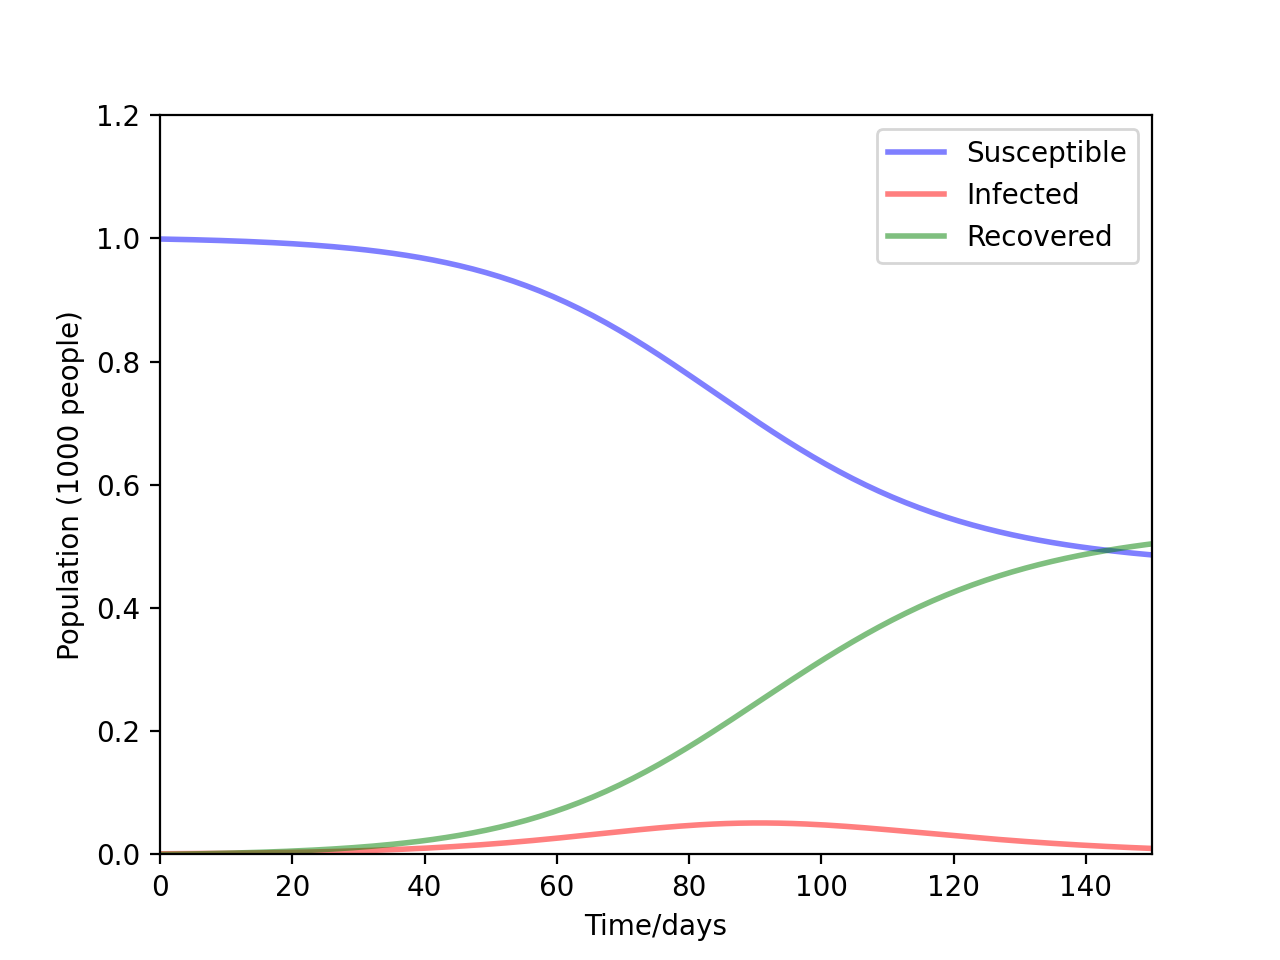

interactive(children=(FloatSlider(value=0.2, description='beta', max=0.4, min=0.1, step=0.05), FloatSlider(val…

In [4]:
%matplotlib notebook
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import numpy as np 
from scipy.integrate import odeint


# Right-hand side of the differential equation
def SIR_LHS(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt


# Visualization
fig = plt.figure()
ax = fig.add_subplot(111, axisbelow=True)
ax.set_xlabel('Time/days')
ax.set_ylabel('Population (1000 people)')
ax.set_xlim(0,150)
ax.set_ylim(0,1.2)

lS, = ax.plot([], [], 'b', alpha=0.5, lw=2, label='Susceptible')
lI, = ax.plot([], [], 'r', alpha=0.5, lw=2, label='Infected')
lR, = ax.plot([], [], 'g', alpha=0.5, lw=2, label='Recovered')

ax.legend()

# Initial values
N = 1000  # Population size remains constant during the simulation (approximately a small closed village)

# One infected person arrives in the village
I0, R0 = 1.0, 0.0

# So everyone else is susceptible
S0 = N - I0 - R0

# We are interested in the developments over the next 5 months, so we take 150 days
t = np.linspace(0, 150, 150)

# Initial value vector
y0 = S0, I0, R0

@interact(beta=(0.1,0.4,0.05),gamma=(0.05,0.5,0.01))
def simulation(beta=0.2,gamma=0.1):
    """
    Interactive simulation of the SIR model
    """
    
    # Numerical solution
    ret = odeint(SIR_LHS, y0, t, args=(N, beta, gamma))
    S, I, R = ret.T

    # ax.clear()
    lS.set_data(t,S/1000)
    lI.set_data(t,I/1000)
    lR.set_data(t,R/1000)
    

In [ ]:
# My problem 

## Task: SEIRS Epidemic Spread (A More Sophisticated Model)

The SEIRS model describes epidemic spread characteristics where there is a latent (E) period between infection and becoming infectious. In addition to the SIR model, it includes mortality and the fact that those who have recovered become susceptible to infection again after a certain period of time.

The differential equation system of the SEIRS model is:
\begin{align}
\dot{S} &= \underbrace{\mu N}_{birth}-\underbrace{\frac{\beta}{N}IS}_{infection} + \underbrace{\omega R}_{loss\, of\, immunity}
-\underbrace{\mu S}_{natural\, death} \\
\dot{E} &= \underbrace{\frac{\beta}{N}IS}_{infection}-\underbrace{\sigma E}_{latent}-\underbrace{\mu E}_{natural\, death} \\
\dot{I} &= \underbrace{\sigma E}_{latent} - \underbrace{\gamma I}_{recovery}-\underbrace{(\mu + \alpha) I}_{mortality} \\
\dot{R} &= \underbrace{\gamma I}_{recovery} - \underbrace{\omega R}_{loss\, of\, immunity} - \underbrace{\mu R}_{natural\, death} \\
N &= S+E+I+R
\end{align}

The model is written for a population in equilibrium, where individuals are born and die at the same rate $\mu>0$. The epidemic imposes an additional mortality rate $\alpha>0$ on those infected.

**Let's create an SEIR model simulation (it doesn't need to be interactive).**

Suggested parameter values: $1/\gamma = 14\,days$, $1/\sigma = 7\,days$, $1/\omega = 1\,year$, $1/\mu = 76\,years$, $\beta = 0.21\,day^{-1}$, $1/\alpha= 7\,days$.

The initial values should be: $S(0)=10^6$, $E(0)=10.0$, $I(0)=R(0)=0.0$.
